# Experimentation Request for Comment (RFC): Are Infants Whose Low-Income  Mothers Exclusively Breastfeed Them Healthier Than Those Whose Low-Income Mothers Don't Breastfeed Them At All?


## Background

On December 2, 2010, the Department of Health & Human Service (DHHS) released Healthy People 2020, a 10-year national health improvement roadmap developed by the Centers for Disease Control & Prevention (CDC). Four of its objectives regarding maternal, infant, & child health, and five sub-objectives aligned to them focus on [breastfeeding](https://www.cdc.gov/breastfeeding/policy/hp2020.htm). 

Key findings from the CDC's [National Health and Nutrition Examination Survey](https://www.cdc.gov/nchs/data/databriefs/db05.htm) inidcate that mothers who are younger than 20, hold a high school diploma or less, are African American, live in rural areas, or are considered low-income according to their state's poverty threshold are least likely to exclusively breastfeed their infants through the first 3 months at a minimum. 

Breastfeeding's established relationship to infants' health outcomes as described by Cornell University researchers in this [article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3508512/) would imply that Healthy People 2020 should prioritize initiatives that aim to increase rates among population segments that are historically least likely to do so based on their demographic profile (age, education level, race, and socioeconomic status). 

Breastfeeding nourishes infants, confers immunoprotection, and regulates growth, development, and metabolism via antibodies (such as sIgA, IgM, and IgG), as well as via hormones, neuropeptides, and growth factors. Infants who are not breastfed, or who are breastfed for short periods and/or at low intensity, are at higher risk for infections and diseases than those who are breastfed optimally. Those infections and diseases include acute lymphoblastic leukemia, gastrointestinal infections, obesity, and upper/lower respiratory infections.

Researchers have also studied the health care costs of formula-feeding in the first year of life and found that compared to infants exclusively breastfed for 3 months, infants never breastfed made 2,033 more illness-related visits, spent 212 more days in the hospital, and needed 609 more prescriptions in the first year (n=1,000 for both cohorts). 

The Kaggle [dataset](https://www.kaggle.com/jpmiller/publicassistance/data) I chose was originally sourced from the U.S. Census Bureau’s Small Area Income & Poverty Estimates program. It focuses on Fiscal Year (FY) 2016 participation in the Special Supplemental Nutrition Program for Women, Infants, and Children (WIC), which allocates federal and state funds to providing supplemental food, baby formula, healthcare, and nutritional education to low-income women and children younger than 5 years old. I selected variables from it to focus on and analyzed them alongside additional data excerpted from the Pediatric Clinics of North America article cited above. 

## Analysis 

In [124]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The code for this notebook is hidden for easier reading.
To toggle it on/off, please click <a href="javascript:code_toggle()">here</a>.''')

The variables of interest to me from the WIC dataset were:
-  WIC Agency Location ('Where'): 1 Column
-  WIC Recipient Classification ('Who'): 1 Column
-  Infant Breastfeeding Status - Excusively or Not At All('How'): 1 Column
-  Monthly Infant Participation By Breastfeeding Status & FY16 Averages ('October 2015' - 'September 2016' & 'Average'): 13 Columns

For each month in FY16, 91 observations were collected from WIC agencies in all 50 states, 35 Native American tribal territories, 1 region, 4 overseas territories, and the District of Columbia. The 'How' variable has two levels: 'Exclusively Breastfeeding' and 'Not Breastfeeding'. **Hereafter, 'Exclusively Breastfeeding' refers to infants whose low-income mothers *chose not to supplement feeding them with formula*, while 'Not Breastfeeding' refers to infants whose low-income mothers *chose to only feed them with formula*.** There are 182 observations (rows) and 16 columns in the resulting dataframe, of which a random sample (n=5) is shown below: 

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

i_fullybreastfeeding = pd.read_csv('C:\\Users\\beri.e.ndifon\\Documents\\Everything Else\\Personal\\Thinkful\\CSV Datasets\\Unit 1 Capstone Project\\Infants_Exclusively_Breastfeeding.csv')
i_fullybreastfeeding['Who'] = 'Infants'
i_fullybreastfeeding['How'] = 'Exclusively Breastfeeding'

i_notbreastfeeding = pd.read_csv('C:\\Users\\beri.e.ndifon\\Documents\\Everything Else\\Personal\\Thinkful\\CSV Datasets\\Unit 1 Capstone Project\\Infants_Not_Breastfeeding.csv')
i_notbreastfeeding['Who'] = 'Infants'
i_notbreastfeeding['How'] = 'Not Breastfeeding'

sample = [i_fullybreastfeeding, i_notbreastfeeding]
composite = pd.concat(sample)
composite.dropna(inplace=True)
keys = {'State Agency or Indian Tribal Organization':'Where','Average Participation':'Average','2015-10-01 00:00:00':'October 2015','2015-11-01 00:00:00':'November 2015','2015-12-01 00:00:00':'December 2015','2016-01-01 00:00:00':'January 2016','2016-02-01 00:00:00':'February 2016','2016-03-01 00:00:00':'March 2016','2016-04-01 00:00:00':'April 2016','2016-05-01 00:00:00':'May 2016','2016-06-01 00:00:00':'June 2016','2016-07-01 00:00:00':'July 2016','2016-08-01 00:00:00':'August 2016','2016-09-01 00:00:00':'September 2016'}
composite.rename(columns=keys, inplace=True)
composite.sort_values(by='Where',inplace=True)
switchup = pd.melt(composite, id_vars = ['Who','How','Where'], var_name = 'Month & Year')
switchup.rename(columns={'value':'Count'}, inplace=True)
switchup.head()

,Who,How,Where,Month & Year,Count
0,Infants,Not Breastfeeding,"Acoma, Canoncito & Laguna, NM",October 2015,44.0
1,Infants,Exclusively Breastfeeding,"Acoma, Canoncito & Laguna, NM",October 2015,24.0
2,Infants,Not Breastfeeding,Alabama,October 2015,30724.0
3,Infants,Exclusively Breastfeeding,Alabama,October 2015,1889.0
4,Infants,Exclusively Breastfeeding,Alaska,October 2015,1183.0


In [126]:
summary = composite.groupby('How').sum()
summary.sort_values(by='Average',inplace=True)
summary.head()

,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,Average
How,,,,,,,,,,,,,
Exclusively Breastfeeding,268493.0,267157.0,268371.0,266719.0,267723.0,270775.0,268270.0,267844.0,268622.0,264598.0,270037.0,268821.0,2.681192e+05
Not Breastfeeding,1414066.0,1395740.0,1391610.0,1375770.0,1363240.0,1369837.0,1358809.0,1355358.0,1361342.0,1348433.0,1355676.0,1343197.0,1.369423e+06


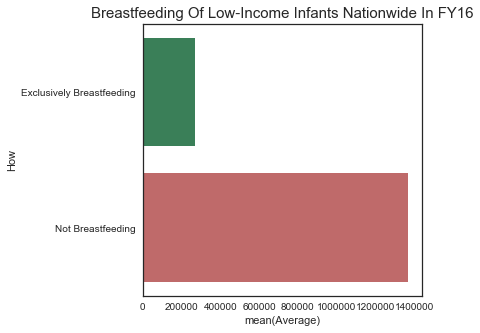

In [127]:
sns.set_style("white")
averages = pd.DataFrame(summary['Average'],index=['Exclusively Breastfeeding','Not Breastfeeding'],columns=['Average'])
averages['How']=['Exclusively Breastfeeding','Not Breastfeeding']
plt.figure(figsize=[5,5])
plot1 = sns.barplot(averages.Average,y=averages.How,palette=sns.color_palette(palette=['seagreen','indianred']))
plot1 = sns.plt.title('Breastfeeding Of Low-Income Infants Nationwide In FY16',fontsize=15)

**Key Takeaway:** Across the U.S. and its overseas territories, I found that there were approximately 5 times more 'Exclusively Breastfeeding' infants than 'Not Breastfeeding infants each month and on average in FY16.

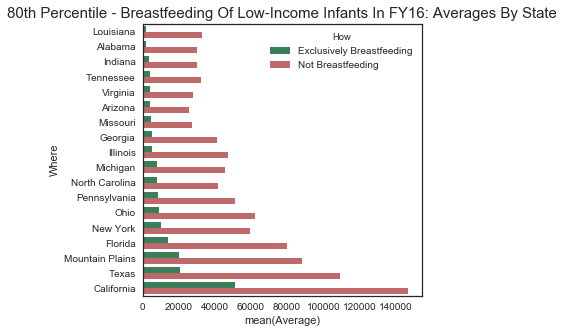

In [128]:
infants = composite.sort_values(by='Average', ascending=True)
infants_not = infants[infants['How'] == 'Not Breastfeeding']
quantiles_80_not = infants_not[infants_not['Average'] > infants_not['Average'].quantile(0.80)]
plt.figure(figsize=[5,5])
plot2 = sns.barplot(data=infants[infants['Where'].isin(quantiles_80_not['Where'])], y='Where', x='Average', hue='How',hue_order=['Exclusively Breastfeeding','Not Breastfeeding'],palette=sns.color_palette(palette=['seagreen','indianred']))
plot2 = sns.plt.title('80th Percentile - Breastfeeding Of Low-Income Infants In FY16: Averages By State', fontsize=15)

**KEY TAKEAWAY:**

Zero-values were reported for several Native American tribal territories across the country (in Arizona, Colorado, Maine, Mississippi, New Mexico, Nevada, New York, North Carolina, North Dakota, Oklahoma, South Dakota, and Wyoming) and all of the included overseas territories (American Samoa, Guam, the Northern Mariana Islands, and the Virgin Islands).

Given these zero-values, I used the 80th percentile to exhibit a sample of the differences between the breastfeeding and not-breastfeeding infant populations. California, Texas, the Mountain Plains region, Florida, New York, Ohio, Pennsylvania, North Carolina, Michigan, Illinois, Georgia, Missouri, Arizona,  Virgina, Tennesee, Indiana, Alabama and Louisinan lead the geographical locations in reported data (listed in descending order). 

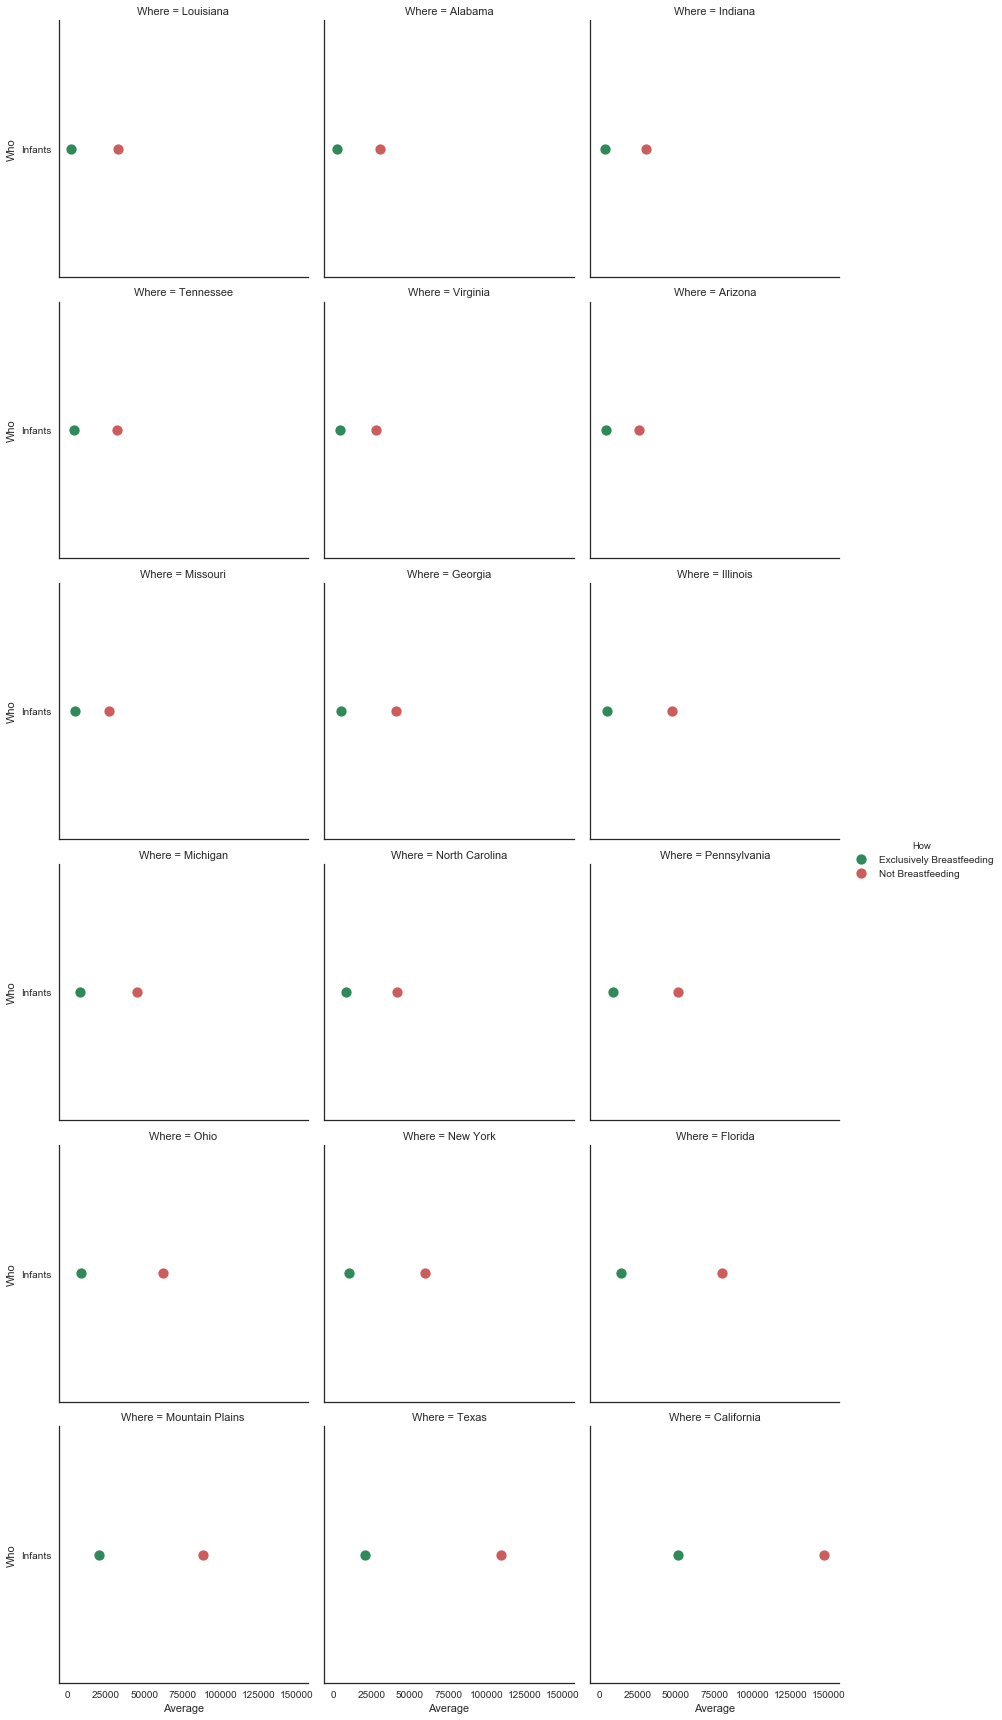

In [129]:
plot3 = sns.factorplot(y='Who', x='Average', col='Where', hue='How', hue_order=['Exclusively Breastfeeding','Not Breastfeeding'], data=infants[infants['Where'].isin(quantiles_80_not['Where'])], col_wrap=3, kind='point',palette=sns.color_palette(palette=['seagreen','indianred']))

**KEY TAKEAWAY:**<br>
<br>
The disparity between breastfeeding and not-breastfeeding infants is largest in California, Texas, Mountain Plains, Florida, New York, and Ohio.<br>

## Experimental Design

**Hypothesis:** Infants whose low-income mothers exclusively breastfeed them are healthier than those whose low-income mothers don't breastfeed them at all.

**Sample:** 2000 infants will be randomly selected from the total population of infants born to low-income mothers from the United States who are beneficiaries of the Children's Health Insurance Plan (CHIP), Medicaid, and/or the Special Supplemental Nutrition Program for Women, Infants, and Children (WIC). Mothers consent to anonymous data collection and adherence to participation guidelines in exchange for a nominal financial incentive. Mothers' breastfeeding behavior (in other words, the decision to exclusively breastfeed or to not do so at all) will dictate their cohort placement but otherwise won't be influenced by the experiment.

**Treatment:** The sample will be equipartitioned into two cohorts (n=1,000 for both cohorts) - infants who are exclusively breastfed throughout the experiment and those who aren't at all. 

## Rollout & Evaluation Plan 


**Impact Window:**<br> 

The first year post-partum.  

**Data Collection Approach:**<br> 

Mothers would report either to an assigned site - a nearby public healthcare facility or a preferred alternate (a nearby private non-profit clinic for example) - for all of their infants' incidental and routine healthcare needs throughout the experiment. These sites will already have electronic health record (EHR) systems implemented, to streamline data collection and will abide by Data Use agreements.   

**Metrics:**<br>
- Infants' Monthly Physical Development Assessment (MPDA) Score
  -  sIgA Antibody Levels (Relative to Reference Values)
  -  IgM Antibody Levels (Relative to Reference Values)
  -  IgG Antibody Levels (Relative to Reference Values)
  -  Hormone Levels (Relative to Reference Values)
  -  Neuropeptide Levels (Relative to Reference Values)
  -  Growth Factor Levels Relative to Reference Values)
  -  Weight (Growth Chart Comparison By Age)
  -  Height (Growth Chart Comparison By Age)
- Frequency of Hospitalizations and Illness-Related Visits
- Severity of Hospitalizations and Illness-Related Visits (Using Infection/Disease Severity Index - Ordinal Scale)

**Success Criteria:**<br>
-  If exclusively breastfed infants have at least 10% higher MPDA scores relative to infants who aren't breastfed at all (alpha=0.05), the null hypothesis that breastfeeding has no impact on infant health can be rejected.
-  Benchmarked against the findings cited in the Cornell University researchers' article, if the frequency and severity of hospitalizations and illness-related visits for breastfed infants are only 25% of those for infants who aren't breastfed, the null hypothesis that breastfeeding has no impact on infant health can also be rejected. 

### Evidence Supporting Breastfeeding's Beneficial Impact On Infant Health

Cornell University researchers used Odds-Ratio and Fold-Risk measures to quantify the magnitude of positive benefits conferred by breastfeeding (in green), and negative effects of inadequately breastfeeding or not doing so at all (in red) respectively. I constructed a CSV dataset for analysis from [Table 4](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3508512/table/T4/) in their article.

In [131]:
outcomes.head()

,Outcome,Breastfeeding?,Odds-Ratio/Fold-Risk
0,Acute Lymphoblastic Leukemia,> 6 Months,0.81
1,Acute Lymphoblastic Leukemia,Never,-1.23
2,Cognitive Development,Increased Levels,5.90
3,Cognitive Development,Baseline Levels,0.00
4,Gastrointestinal Tract Infection,"0-12 Months Old, Increased Levels",0.60


The measures weren't of the same scale, and Fold-Risk was scaled counterintuitively (positive values were being used to communicate negative effects) - I recoded it using negative values (relative to Odds-Ratio's positive values) and then feature-scaled them.

In [132]:
minx = min(outcomes['Odds-Ratio/Fold-Risk'])
maxx= max(outcomes['Odds-Ratio/Fold-Risk'])
outcomes['Odds-Ratio/Fold-Risk']=outcomes['Odds-Ratio/Fold-Risk'].map(lambda x: (x-minx)/(maxx-minx))
outcomes.head()

,Outcome,Breastfeeding?,Odds-Ratio/Fold-Risk
0,Acute Lymphoblastic Leukemia,> 6 Months,0.477949
1,Acute Lymphoblastic Leukemia,Never,0.268718
2,Cognitive Development,Increased Levels,1.000000
3,Cognitive Development,Baseline Levels,0.394872
4,Gastrointestinal Tract Infection,"0-12 Months Old, Increased Levels",0.456410


In [133]:
ALL = outcomes.iloc[0:2]
CD = outcomes.iloc[2:4]
GTI = outcomes.iloc[4:10]
O = outcomes.iloc[12:22]
HRTI = outcomes.iloc[10:12]
ULRTI = outcomes.iloc[26:34]
RTI = pd.concat([HRTI,ULRTI])
SIDS = outcomes.iloc[34:]

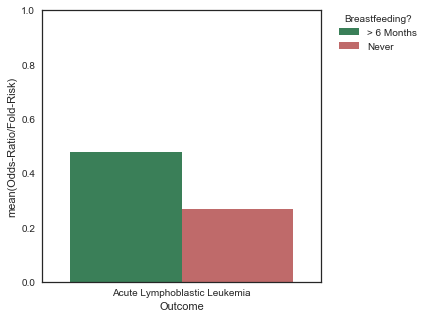

In [134]:
colors = ['seagreen','indianred']
#sns.set_style("white")
plt.figure(figsize=[5,5])
plot = sns.barplot(x=ALL['Outcome'],y=ALL['Odds-Ratio/Fold-Risk'],data=ALL, hue=ALL['Breastfeeding?'],palette=colors)
legend = plt.legend(title='Breastfeeding?', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
yaxis = plt.ylim([0,1])

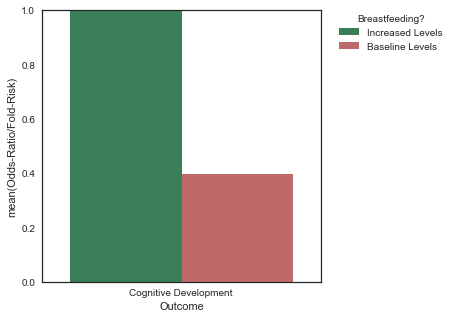

In [135]:
colors = ['seagreen','indianred']
plt.figure(figsize=[5,5])
plot = sns.barplot(x=CD['Outcome'],y=CD['Odds-Ratio/Fold-Risk'],data=CD, hue=CD['Breastfeeding?'],palette=colors)
legend = plt.legend(title='Breastfeeding?', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
yaxis = plt.ylim([0,1])

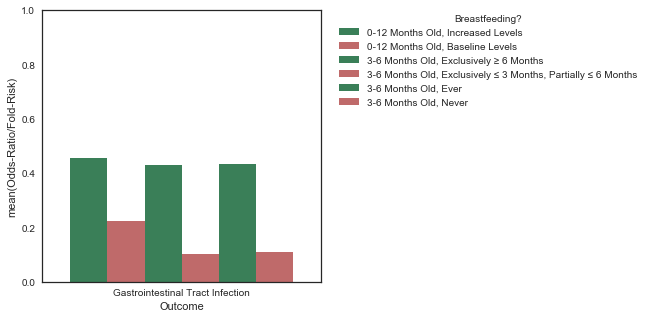

In [136]:
colors = ['seagreen','indianred']
plt.figure(figsize=[5,5])
plot = sns.barplot(x=GTI['Outcome'],y=GTI['Odds-Ratio/Fold-Risk'],data=GTI, hue=GTI['Breastfeeding?'],palette=colors)
legend = plt.legend(title='Breastfeeding?', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
yaxis = plt.ylim([0,1])

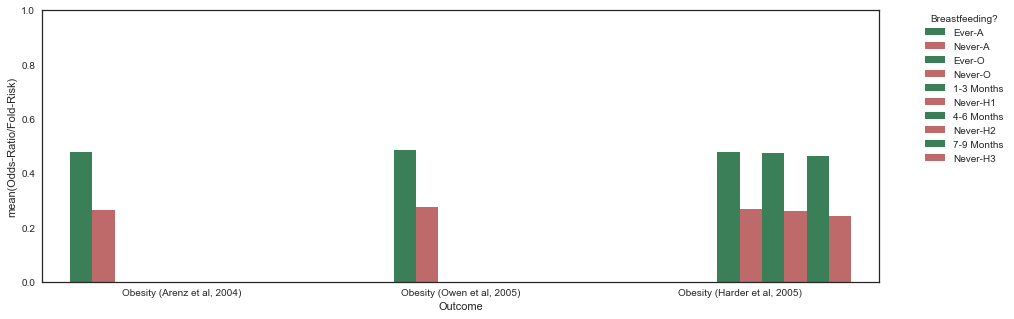

In [137]:
colors = ['seagreen','indianred']
plt.figure(figsize=[15,5])
plot = sns.barplot(x=O['Outcome'],y=O['Odds-Ratio/Fold-Risk'],data=O, hue=O['Breastfeeding?'], palette=colors)
legend = plt.legend(title='Breastfeeding?', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
yaxis = plt.ylim([0,1])

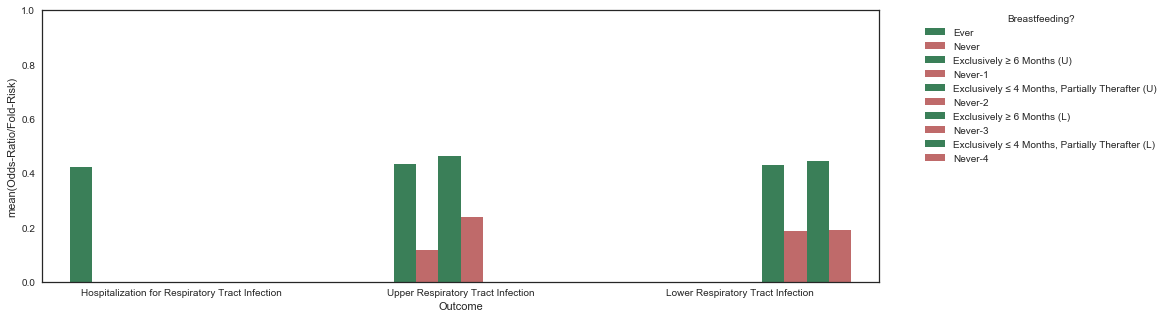

In [138]:
colors = ['seagreen','indianred']
plt.figure(figsize=[15,5])
plot = sns.barplot(x=RTI['Outcome'],y=RTI['Odds-Ratio/Fold-Risk'],data=RTI, hue=RTI['Breastfeeding?'], palette=colors)
legend = plt.legend(title='Breastfeeding?', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
yaxis = plt.ylim([0,1])

In [ ]:
colors = ['seagreen','indianred']
plt.figure(figsize=[5,5])
plot = sns.barplot(x=SIDS['Outcome'],y=SIDS['Odds-Ratio/Fold-Risk'],data=SIDS, hue=SIDS['Breastfeeding?'],palette=colors)
legend = plt.legend(title='Breastfeeding?', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
yaxis = plt.ylim([0,1])

**KEY TAKEAWAY:**<br>

Breastfeeding infants has been shown to confer positive health benefits, in the form of immunoresistance against multiple infections and diseases as well as development and growth, regardless of consistency and duration. The objective of the proposed experiment would be to revalidate these findings in low-income infant-mother populations. 